1. Analyzing data and making train, twsr sets

In [4]:
import pandas as pd

climate = pd.read_csv("weather.csv", index_col = "DATE")
climate.index = pd.to_datetime(climate.index)
climate.head(10)

,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
1978-06-06,CEM00043466,"COLOMBO, CE",NaN,82,86.0,NaN
1978-06-07,CEM00043466,"COLOMBO, CE",NaN,81,NaN,77.0
1978-06-08,CEM00043466,"COLOMBO, CE",NaN,81,NaN,75.0
1978-06-09,CEM00043466,"COLOMBO, CE",NaN,81,88.0,NaN
1978-06-10,CEM00043466,"COLOMBO, CE",NaN,79,NaN,72.0
1978-06-11,CEM00043466,"COLOMBO, CE",NaN,81,NaN,NaN
1978-06-13,CEM00043466,"COLOMBO, CE",NaN,81,NaN,79.0
1978-06-14,CEM00043466,"COLOMBO, CE",NaN,81,NaN,79.0
1978-06-15,CEM00043466,"COLOMBO, CE",NaN,81,NaN,77.0


<Axes: xlabel='DATE'>

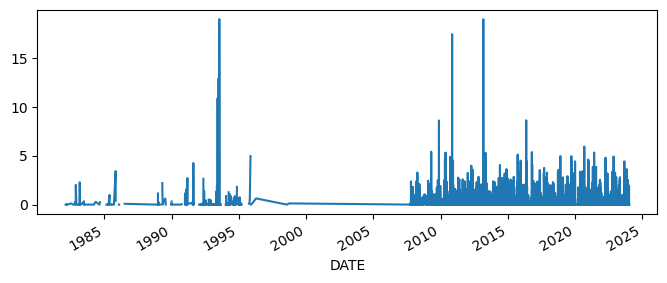

In [5]:
climate["PRCP"].plot(figsize=(8,3))

<Axes: xlabel='DATE'>

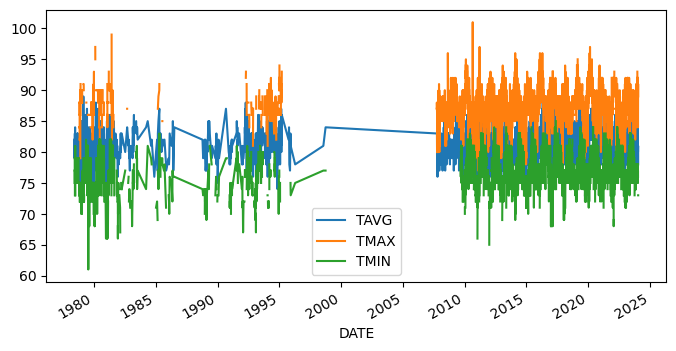

In [6]:
climate.drop(columns=["PRCP"]).plot(figsize=(8, 4))


In [7]:
features = ["PRCP", "TAVG", "TMAX", "TMIN"]
climate[features].apply(pd.isnull).sum()

PRCP     974
TAVG       0
TMAX    1247
TMIN    2010
dtype: int64

In [8]:
climate[features].apply(pd.isnull).sum()/climate.shape[0]*100

PRCP    14.348851
TAVG     0.000000
TMAX    18.370654
TMIN    29.611078
dtype: float64

In [9]:
climate["PRCP"].value_counts()

PRCP
0.00    3061
0.02     185
0.01     175
0.04     123
0.06      88
        ... 
5.12       1
1.54       1
2.41       1
2.49       1
1.95       1
Name: count, Length: 311, dtype: int64

In [10]:
climate["PRCP"] = climate["PRCP"].fillna(0)
climate["TMAX"] = climate["TMAX"].ffill()



In [11]:
climate["TMIN"] = climate["TMIN"].fillna(2*climate["TAVG"]-climate["TMAX"])

In [12]:
climate

,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
1978-06-06,CEM00043466,"COLOMBO, CE",0.0,82,86.0,78.0
1978-06-07,CEM00043466,"COLOMBO, CE",0.0,81,86.0,77.0
1978-06-08,CEM00043466,"COLOMBO, CE",0.0,81,86.0,75.0
1978-06-09,CEM00043466,"COLOMBO, CE",0.0,81,88.0,74.0
1978-06-10,CEM00043466,"COLOMBO, CE",0.0,79,88.0,72.0
...,...,...,...,...,...,...
2024-01-10,CEM00043466,"COLOMBO, CE",0.0,80,84.0,77.0
2024-01-11,CEM00043466,"COLOMBO, CE",0.0,81,89.0,76.0
2024-01-13,CEM00043466,"COLOMBO, CE",0.0,81,91.0,71.0


In [13]:
climate[features].apply(pd.isnull).sum()

PRCP    0
TAVG    0
TMAX    0
TMIN    0
dtype: int64

<Axes: xlabel='DATE'>

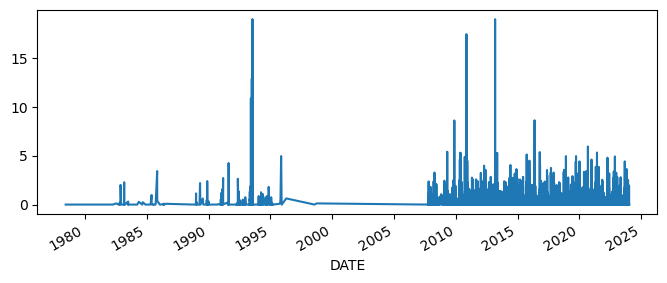

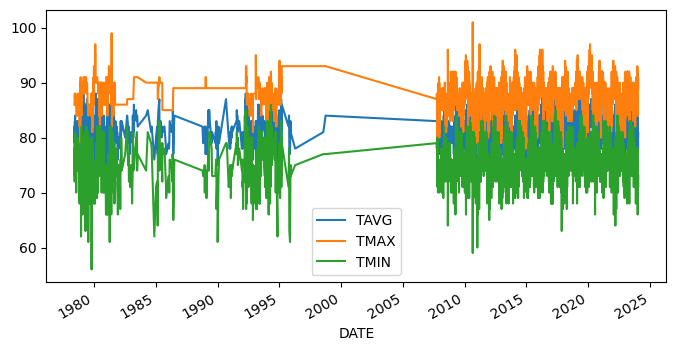

In [14]:
climate["PRCP"].plot(figsize=(8,3))
climate.drop(columns=["PRCP"]).plot(figsize=(8, 4))

In [15]:
climate_final = climate[["PRCP","TMAX","TMIN"]].copy()
climate_final.columns = ["PRCP","TMAX","TMIN"]
climate_final

,PRCP,TMAX,TMIN
DATE,,,
1978-06-06,0.0,86.0,78.0
1978-06-07,0.0,86.0,77.0
1978-06-08,0.0,86.0,75.0
1978-06-09,0.0,88.0,74.0
1978-06-10,0.0,88.0,72.0
...,...,...,...
2024-01-10,0.0,84.0,77.0
2024-01-11,0.0,89.0,76.0
2024-01-13,0.0,91.0,71.0


In [16]:
climate_final_cel = climate_final.copy()
climate_final_cel["TMAX"] = ((climate_final_cel["TMAX"]-32)*5/9).round(2)
climate_final_cel["TMIN"] = ((climate_final_cel["TMIN"]-32)*5/9).round(2)

In [17]:
climate_final_cel

,PRCP,TMAX,TMIN
DATE,,,
1978-06-06,0.0,30.00,25.56
1978-06-07,0.0,30.00,25.00
1978-06-08,0.0,30.00,23.89
1978-06-09,0.0,31.11,23.33
1978-06-10,0.0,31.11,22.22
...,...,...,...
2024-01-10,0.0,28.89,25.00
2024-01-11,0.0,31.67,24.44
2024-01-13,0.0,32.78,21.67


In [18]:
climate_final_cel["Month_TMAX_AVG"] = climate_final_cel["TMAX"].rolling(30).mean()
climate_final_cel

,PRCP,TMAX,TMIN,Month_TMAX_AVG
DATE,,,,
1978-06-06,0.0,30.00,25.56,NaN
1978-06-07,0.0,30.00,25.00,NaN
1978-06-08,0.0,30.00,23.89,NaN
1978-06-09,0.0,31.11,23.33,NaN
1978-06-10,0.0,31.11,22.22,NaN
...,...,...,...,...
2024-01-10,0.0,28.89,25.00,31.629667
2024-01-11,0.0,31.67,24.44,31.629667
2024-01-13,0.0,32.78,21.67,31.685333


In [19]:
climate_final_cel = climate_final_cel.iloc[30:,:].copy()
climate_final_cel

,PRCP,TMAX,TMIN,Month_TMAX_AVG
DATE,,,,
1978-07-13,0.0,30.00,25.00,30.481000
1978-07-14,0.0,30.00,25.00,30.481000
1978-07-17,0.0,30.00,23.89,30.481000
1978-07-19,0.0,30.00,25.00,30.444000
1978-07-20,0.0,30.00,23.89,30.407000
...,...,...,...,...
2024-01-10,0.0,28.89,25.00,31.629667
2024-01-11,0.0,31.67,24.44,31.629667
2024-01-13,0.0,32.78,21.67,31.685333


In [20]:
climate_final_cel["Tommorow_TMAX"] = climate_final_cel.shift(-1)["TMAX"]
climate_final_cel

,PRCP,TMAX,TMIN,Month_TMAX_AVG,Tommorow_TMAX
DATE,,,,,
1978-07-13,0.0,30.00,25.00,30.481000,30.00
1978-07-14,0.0,30.00,25.00,30.481000,30.00
1978-07-17,0.0,30.00,23.89,30.481000,30.00
1978-07-19,0.0,30.00,25.00,30.444000,30.00
1978-07-20,0.0,30.00,23.89,30.407000,30.00
...,...,...,...,...,...
2024-01-10,0.0,28.89,25.00,31.629667,31.67
2024-01-11,0.0,31.67,24.44,31.629667,32.78
2024-01-13,0.0,32.78,21.67,31.685333,32.78


In [21]:
predictors = ["PRCP", "TMAX", "TMIN","Month_TMAX_AVG"]
target = ["Tommorow_TMAX"]

In [22]:
train_set = climate_final_cel.loc[:"2020-12-31"]
test_set = climate_final_cel.loc["2020-12-31":"2024-01-14"]

2. Train the model using Ridge Regression as the model because its handling colinearity between features well

In [23]:
from sklearn.linear_model import Ridge

model = Ridge(alpha= 0.1)
model.fit(train_set[predictors], train_set[target])

Ridge(alpha=0.1)

3. Predicting and Evaluation

In [24]:
predictions = model.predict(test_set[predictors])

In [25]:
predictions


array([[30.40712047],
       [30.43785837],
       [31.06240722],
       ...,
       [31.59079784],
       [32.19503527],
       [32.21890655]])

In [26]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test_set["Tommorow_TMAX"], predictions)

0.8532880366062443

4. Compare actual values and predicted values

In [27]:
combined = pd.concat([test_set["Tommorow_TMAX"], pd.Series(predictions.flatten(), index=test_set.index)], axis=1)
combined.columns = ["Actual", "Pedictions"]
combined

,Actual,Pedictions
DATE,,
2020-12-31,30.00,30.407120
2021-01-01,31.11,30.437858
2021-01-02,30.00,31.062407
2021-01-03,30.56,30.453843
2021-01-04,30.56,30.740842
...,...,...
2024-01-09,28.89,31.014610
2024-01-10,31.67,30.059933
2024-01-11,32.78,31.590798


<Axes: xlabel='DATE'>

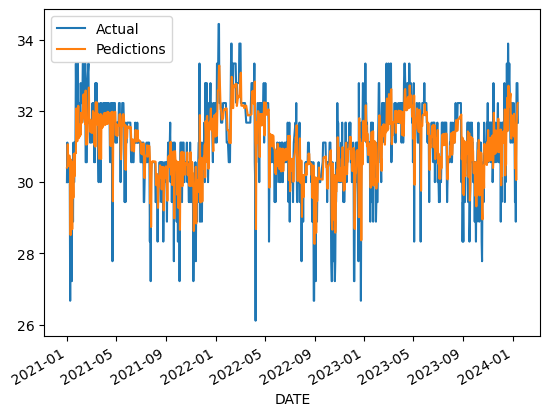

In [28]:
combined.plot()

In [29]:
import joblib

joblib.dump(model, 'Tommorow TMAX predictor.pkl')

['Tommorow TMAX predictor.pkl']

5. Simple widgets for play the algorithm

In [30]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np

prcp_input = widgets.Text(
    value='',
    placeholder='Enter prcp',
    description='PRCP:',
    disabled=False
)

tmax_input = widgets.Text(
    value='',
    placeholder='Enter tmax',
    description='TMAX:',
    disabled=False
)

tmin_input = widgets.Text(
    value='',
    placeholder='tmin',
    description='TMIN:',
    disabled=False
)

month_tmax_avg_input = widgets.Text(
    value='',
    placeholder='Enter month_tmax_avg',
    description='Month_TMAX_AVG:',
    disabled=False
)

button = widgets.Button(
    description='OK',
    disabled=False,
    button_style='',
    tooltip='Click me',
    icon='check'
)

output = widgets.Output()

def on_button_clicked(b):
    with output:
        output.clear_output()
        prcp = prcp_input.value
        tmax = tmax_input.value
        tmin = tmin_input.value
        month_tmax_avg = month_tmax_avg_input.value

        if not prcp or not tmax or not tmin or not month_tmax_avg:
            print("Error: All fields are required.")
            return
        
        try:
            prcp = float(prcp)
            tmax = float(tmax)
            tmin = float(tmin)
            month_tmax_avg = float(month_tmax_avg)
        except ValueError:
            print("Error: All inputs must be numeric.")
            return
        prediction = model.predict(pd.DataFrame(np.array([prcp, tmax, tmin, month_tmax_avg]).reshape(1,-1), columns = ["PRCP","TMAX","TMIN", "Month_TMAX_AVG"]))
        pred = int(prediction[0][0])
        print(pred, "C")

button.on_click(on_button_clicked)
display(prcp_input, tmax_input, tmin_input, month_tmax_avg_input, button, output)


Text(value='', description='PRCP:', placeholder='Enter prcp')

Text(value='', description='TMAX:', placeholder='Enter tmax')

Text(value='', description='TMIN:', placeholder='tmin')

Text(value='', description='Month_TMAX_AVG:', placeholder='Enter month_tmax_avg')

Button(description='OK', icon='check', style=ButtonStyle(), tooltip='Click me')

Output()